## Lab 8: Measurement and Control of Charged Particle Beams
### Sunil Pokharel

#### Part 1: Neural Network Surrogate Model

In [2]:
import sys
print(sys.version)

3.9.16 | packaged by conda-forge | (main, Feb  1 2023, 21:38:11) 
[Clang 14.0.6 ]


In [3]:
import keras
import tensorflow as tf

print(keras.__version__)
print(tf.__version__)

2.13.1
2.13.0


In [4]:
import numpy as np
import matplotlib.pyplot as plt
#from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import RobustScaler, MinMaxScaler
#from keras.models import Sequential, Model
#from keras.layers import Dense, GaussianNoise, Input, Flatten, Conv1D
#from tensorflow.keras import regularizers

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, MinMaxScaler
from keras.models import Sequential, Model
from keras.layers import Dense, GaussianNoise, Input, Flatten, Conv1D
from tensorflow.keras import regularizers

(2500, 11) (2500, 9)


(array([ 30.,  81., 218., 438., 566., 530., 356., 187.,  71.,  23.]),
 array([-12.87722412,   1.63005555,  16.13733521,  30.64461488,
         45.15189455,  59.65917422,  74.16645389,  88.67373355,
        103.18101322, 117.68829289, 132.19557256]),
 <BarContainer object of 10 artists>)

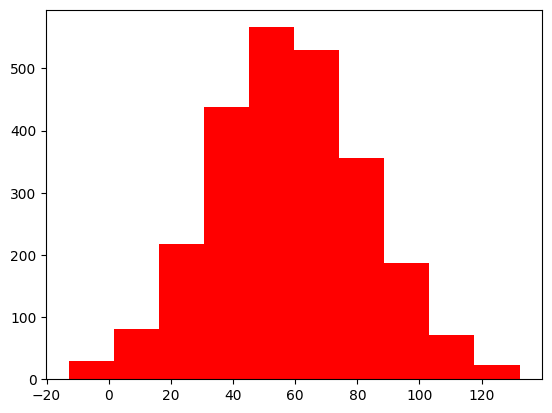

In [9]:
inputs = np.load('lab_8_inputs.npy')
outputs= np.load('lab_8_outputs.npy')
print(np.shape(inputs), np.shape(outputs))
plt.figure()
plt.hist(inputs[:,0],color ='r')

(array([ 22.,  65., 183., 359., 483., 578., 436., 237., 100.,  37.]),
 array([0.0001933 , 0.00083406, 0.00147482, 0.00211558, 0.00275634,
        0.00339711, 0.00403787, 0.00467863, 0.00531939, 0.00596015,
        0.00660092]),
 <BarContainer object of 10 artists>)

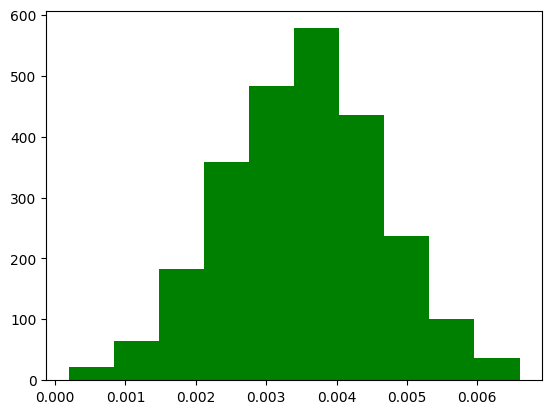

In [10]:
plt.figure()
plt.hist(outputs[:,0],color ='g')

In [27]:
from sklearn.preprocessing import MinMaxScaler

# Create separate scalers for X and y
scaler_x = MinMaxScaler(feature_range=(-1, 1))
scaler_y = MinMaxScaler(feature_range=(-1, 1))

# Fit and transform X and y separately
x_scaled = scaler_x.fit_transform(inputs)
y_scaled = scaler_y.fit_transform(outputs)

# To get back to the original data from the scaled data
x_original = scaler_x.inverse_transform(x_scaled)
y_original = scaler_y.inverse_transform(y_scaled)


In [29]:
print(inputs[0], x_original[0])

[ 5.80000000e+01  3.43773291e+07  5.32253071e-03  4.22718574e-05
  7.98193851e-03  3.12159010e-03  7.61551882e-07  1.38062029e-03
  4.03601780e-03 -3.45286991e-06  2.30578993e-03] [ 5.80000000e+01  3.43773291e+07  5.32253071e-03  4.22718574e-05
  7.98193851e-03  3.12159010e-03  7.61551882e-07  1.38062029e-03
  4.03601780e-03 -3.45286991e-06  2.30578993e-03]


In [31]:
x_scaled.shape, y_scaled.shape 

((2500, 11), (2500, 9))

In [32]:
x_original.shape, y_original.shape 

((2500, 11), (2500, 9))

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, MinMaxScaler
from keras.models import Sequential, Model
from keras.layers import Dense, GaussianNoise, Input, Flatten, Conv1D
from tensorflow.keras import regularizers
split = 80
x_train, x_val, y_train, y_val = train_test_split(x_scaled, y_scaled, test_size = (100 - split) / 100.,random_state = 42)

## Training model

In [18]:
layers = [20, 80, 80, 80, 80, 80, 80, 20]
activation_function = 'relu'
## Adding gaussian noise layers
model =Sequential()
for i in layers:
    model.add(Dense(i, activation=activation_function))
    model.add(GaussianNoise(0.01))
    
model.add(Dense(y_train.shape[1], activation='linear'))
model.compile(loss='mean_squared_error', optimizer='adam')
hist1 = model.fit(x=x_train, y=y_train, validation_data= (x_val, y_val), batch_size = 10, 
                 shuffle = 'true', epochs = 100,verbose = 'false')

Epoch 1/100


2023-08-11 17:14:44.200151: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2023-08-11 17:14:44.200169: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2023-08-11 17:14:44.200176: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2023-08-11 17:14:44.200353: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-08-11 17:14:44.200367: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2023-08-11 17:14:44.594162: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Epoch 2/100


2023-08-11 17:14:45.763299: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Epoch 21/100
Epoch 22/100
Epoch 23/100
Epoch 24/100
Epoch 25/100
Epoch 26/100
Epoch 27/100
Epoch 28/100
Epoch 29/100
Epoch 30/100
Epoch 31/100
Epoch 32/100
Epoch 33/100
Epoch 34/100
Epoch 35/100
Epoch 36/100
Epoch 37/100
Epoch 38/100
Epoch 39/100
Epoch 40/100
Epoch 41/100
Epoch 42/100
Epoch 43/100
Epoch 44/100
Epoch 45/100
Epoch 46/100
Epoch 47/100
Epoch 48/100
Epoch 49/100
Epoch 50/100
Epoch 51/100
Epoch 52/100
Epoch 53/100
Epoch 54/100
Epoch 55/100
Epoch 56/100
Epoch 57/100
Epoch 58/100
Epoch 59/100
Epoch 60/100
Epoch 61/100
Epoch 62/100
Epoch 63/100
Epoch 64/100
Epoch 65/100
Epoch 66/100
Epoch 67/100
Epoch 68/100
Epoch 69/100
Epoch 70/100
Epoch 71/100
Epoch 72/100
Epoch 73/100
Epoch 74/100
Epoch 75/100
Epoch 76/100
Epoch 77/100
Epoch 78/100
Epoch 79/100
Epoch 

In [19]:
epoch1 = hist1.epoch
val_loss1 = hist1.history['val_loss']
train_loss1 = hist1.history['loss']

In [20]:
layers = [20, 80, 80, 80, 80, 80, 80, 20]
activation_function = 'relu'
## Adding gaussian noise layers
model =Sequential()
for i in layers:
    model.add(Dense(i, activation=activation_function))
    model.add(GaussianNoise(0.01))
    
model.add(Dense(y_train.shape[1], activation='linear'))
model.compile(loss='mean_squared_error', optimizer='adam')
hist2 = model.fit(x=x_train, y=y_train, validation_data= (x_val, y_val), batch_size = 100, 
                 shuffle = 'true', epochs = 100,verbose = 'false')

Epoch 1/100


2023-08-11 17:16:24.203676: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Epoch 2/100
Epoch 3/100


2023-08-11 17:16:24.507782: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Epoch 21/100
Epoch 22/100
Epoch 23/100
Epoch 24/100
Epoch 25/100
Epoch 26/100
Epoch 27/100
Epoch 28/100
Epoch 29/100
Epoch 30/100
Epoch 31/100
Epoch 32/100
Epoch 33/100
Epoch 34/100
Epoch 35/100
Epoch 36/100
Epoch 37/100
Epoch 38/100
Epoch 39/100
Epoch 40/100
Epoch 41/100
Epoch 42/100
Epoch 43/100
Epoch 44/100
Epoch 45/100
Epoch 46/100
Epoch 47/100
Epoch 48/100
Epoch 49/100
Epoch 50/100
Epoch 51/100
Epoch 52/100
Epoch 53/100
Epoch 54/100
Epoch 55/100
Epoch 56/100
Epoch 57/100
Epoch 58/100
Epoch 59/100
Epoch 60/100
Epoch 61/100
Epoch 62/100
Epoch 63/100
Epoch 64/100
Epoch 65/100
Epoch 66/100
Epoch 67/100
Epoch 68/100
Epoch 69/100
Epoch 70/100
Epoch 71/100
Epoch 72/100
Epoch 73/100
Epoch 74/100
Epoch 75/100
Epoch 76/100
Epoch 77/100
Epoch 78/100
Epoch 79/100
Epoch 80/100
Epoch

In [21]:
epoch2 = hist2.epoch
val_loss2 = hist2.history['val_loss']
train_loss2 = hist2.history['loss']

In [22]:
layers = [20, 80, 80, 80, 80, 80, 80, 20]
activation_function = 'relu'
## Adding gaussian noise layers
model =Sequential()
for i in layers:
    model.add(Dense(i, activation=activation_function))
    model.add(GaussianNoise(0.01))
    
model.add(Dense(y_train.shape[1], activation='linear'))
model.compile(loss='mean_squared_error', optimizer='adam')
hist3 = model.fit(x=x_train, y=y_train, validation_data= (x_val, y_val), batch_size = 1000, 
                 shuffle = 'true', epochs = 100,verbose = 'false')

Epoch 1/100


2023-08-11 17:16:35.659242: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100


2023-08-11 17:16:35.904940: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Epoch 21/100
Epoch 22/100
Epoch 23/100
Epoch 24/100
Epoch 25/100
Epoch 26/100
Epoch 27/100
Epoch 28/100
Epoch 29/100
Epoch 30/100
Epoch 31/100
Epoch 32/100
Epoch 33/100
Epoch 34/100
Epoch 35/100
Epoch 36/100
Epoch 37/100
Epoch 38/100
Epoch 39/100
Epoch 40/100
Epoch 41/100
Epoch 42/100
Epoch 43/100
Epoch 44/100
Epoch 45/100
Epoch 46/100
Epoch 47/100
Epoch 48/100
Epoch 49/100
Epoch 50/100
Epoch 51/100
Epoch 52/100
Epoch 53/100
Epoch 54/100
Epoch 55/100
Epoch 56/100
Epoch 57/100
Epoch 58/100
Epoch 59/100
Epoch 60/100
Epoch 61/100
Epoch 62/100
Epoch 63/100
Epoch 64/100
Epoch 65/100
Epoch 66/100
Epoch 67/100
Epoch 68/100
Epoch 69/100
Epoch 70/100
Epoch 71/100
Epoch 72/100
Epoch 73/100
Epoch 74/100
Epoch 75/100
Epoch 76/100
Epoch 77/100
Epoch 78/100
Epoch 79/100
Epoch 80/100
Epoch 81/100
Epoch 82/100
Epoch 83/100
Epoch 84/100
Epoch 85/100


In [26]:
epoch3 = hist3.epoch
val_loss3 = hist3.history['val_loss']
train_loss3 = hist3.history['loss']
val_loss3

[0.9980297684669495,
 0.8044960498809814,
 0.6763922572135925,
 0.5868711471557617,
 0.5275148153305054,
 0.4801672399044037,
 0.4350316822528839,
 0.40041419863700867,
 0.38334137201309204,
 0.38198524713516235,
 0.3922090530395508,
 0.41125884652137756,
 0.43051859736442566,
 0.46591782569885254,
 0.5174431204795837,
 0.5697939395904541,
 0.6111977696418762,
 0.6579770445823669,
 0.7337003946304321,
 0.858964204788208,
 0.9797877073287964,
 1.1095736026763916,
 1.196444034576416,
 1.2936640977859497,
 1.238750696182251,
 1.0996147394180298,
 0.9552857875823975,
 0.8327983617782593,
 0.750190794467926,
 0.6710397005081177,
 1.5890461206436157,
 1.444183588027954,
 1.20902681350708,
 1.6028904914855957,
 1.9271527528762817,
 2.205634117126465,
 2.7051331996917725,
 2.4204869270324707,
 2.0134024620056152,
 3.133941888809204,
 1.5474213361740112,
 2.8180975914001465,
 4.033146381378174,
 10.730111122131348,
 13.006226539611816,
 20.944393157958984,
 26.00067138671875,
 36.87351226806640

/var/folders/t7/yy62typn4y1cknks8l305k2h0000gn/T/ipykernel_2349/670629008.py:19: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<function matplotlib.pyplot.show(close=None, block=None)>

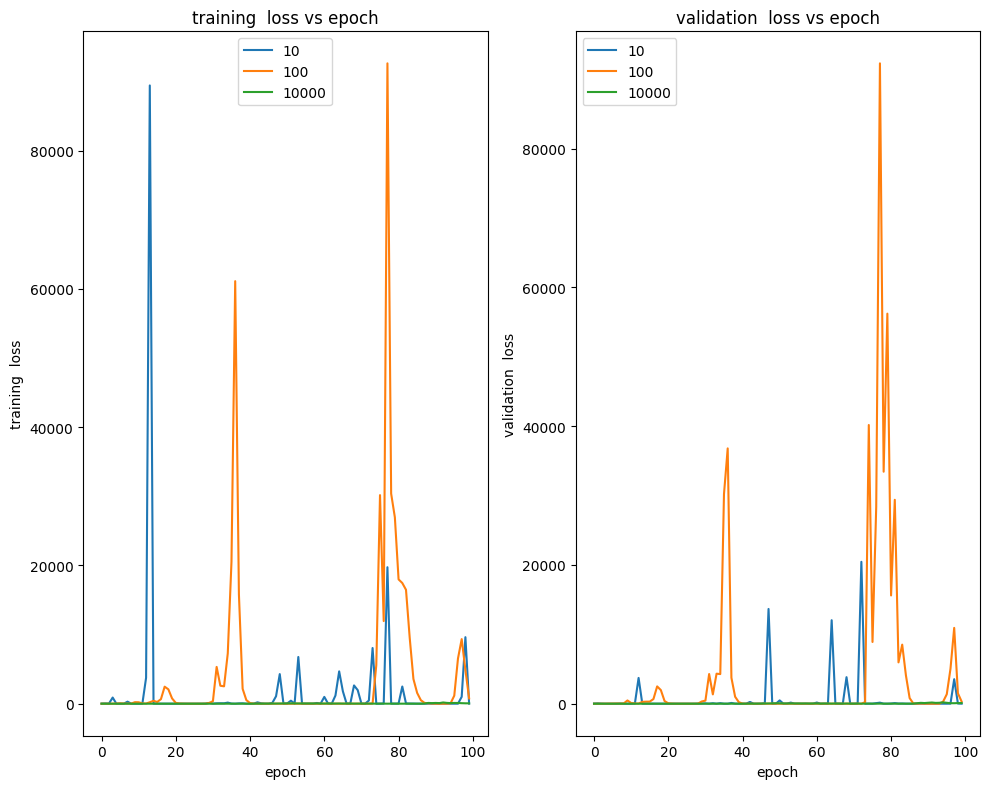

In [25]:
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
plt.plot(epoch1, train_loss1, label ='10')
plt.plot(epoch2, train_loss2, label ='100')
plt.plot(epoch3, train_loss3, label ='10000')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('training  loss')
plt.title('training  loss vs epoch')
plt.tight_layout()
plt.subplot(1,2,2)
plt.plot(epoch1, val_loss1, label ='10')
plt.plot(epoch2, val_loss2, label ='100')
plt.plot(epoch3, val_loss3, label ='10000')
plt.xlabel('epoch')
plt.ylabel('validation  loss')
plt.title('validation  loss vs epoch')
plt.legend()
plt.tight_layout()
plt.show

In [ ]:
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
plt.semilogy(epoch, train_loss1, label ='10')
plt.semilogy(epoch, train_loss2, label ='100')
plt.semilogy(epoch, train_loss3, label ='10000')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('log(training  loss)')
plt.title('logarithm of training  loss vs epoch')
plt.tight_layout()
plt.subplot(1,2,2)
plt.semilogy(epoch, val_loss1, label ='10')
plt.semilogy(epoch, val_loss2, label ='100')
plt.semilogy(epoch, val_loss3, label ='10000')
plt.xlabel('epoch')
plt.ylabel('log(validation  loss)')
plt.title('logarith of validation  loss vs epoch')
plt.legend()
plt.tight_layout()
plt.show

In [ ]:
y_pred = model.predict(x=x_val)
row,col= y_pred.shape
print(row, col)
plt.figure(figsize=(15,15))
ind =int(np.sqrt(col))+1
for i in range(0,col):
    plt.subplot(ind,ind,i+1)
    plt.hexbin(y_val[:,i], y_pred [:,i], cmap= 'Reds')#'viridis')
    plt.ylabel('predicted outputs')
    plt.xlabel('actual outputs')
    plt.tight_layout()
plt.show()
residuals= (y_pred -y_val)
rsq = np.sum(residuals**2, axis =0)/(np.sum(y_val**2, axis=0))
print(rsq)

In [ ]:
!conda config --add channels conda-forge
!conda config --set channel_priority strict
!conda install pygmo -y 

In [ ]:
!conda install pygmo -y